In [3]:
import pandas as pd
import numpy as np
import matplotlib

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

In [335]:
df = pd.read_csv("../DATA/merged_datas.csv")
df = df.set_index("date")
df

,GSCPI,IP,F 건설업,건설투자,기성총액,건축공사,토목공사,국고채(3년),"회사채(3년, BBB-)",Dubai(현물),전국,합계,신축,증축/개축/이전/대수선,용도변경,원/미국달러(매매기준율),철광석,유연탄
date,,,,,,,,,,,,,,,,,,
1960-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-04,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-07,NaN,NaN,NaN,-16.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-10,NaN,NaN,NaN,-10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01,NaN,NaN,NaN,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01,0.968073,-0.340898,2082.0,1.3,13915617.0,10645091.0,3270526.0,3.460,10.788,79.32,83.9,10907.0,7026.0,1157.0,2724.0,1228.7,133.07,214.39
2023-02,-0.303415,0.586011,2121.0,NaN,15060518.0,11787882.0,3272636.0,3.470,10.631,81.30,93.2,11337.0,7239.0,1312.0,2786.0,1317.4,137.06,211.38
2023-03,-1.167226,0.111609,2125.0,NaN,14519456.0,10975809.0,3543647.0,3.461,10.595,76.84,94.9,14203.0,8987.0,1590.0,3626.0,1303.8,141.13,209.96


In [334]:
df2 = df.copy()
df2

,GSCPI,IP,F 건설업,건설투자,기성총액,건축공사,토목공사,국고채(3년),"회사채(3년, BBB-)",Dubai(현물),전국,합계,신축,증축/개축/이전/대수선,용도변경,원/미국달러(매매기준율),철광석,유연탄
date,,,,,,,,,,,,,,,,,,
1960-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-04,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-07,NaN,NaN,NaN,-16.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-10,NaN,NaN,NaN,-10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01,NaN,NaN,NaN,24.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01,0.968073,-0.340898,2082.0,1.3,13915617.0,10645091.0,3270526.0,3.460,10.788,79.32,83.9,10907.0,7026.0,1157.0,2724.0,1228.7,133.07,214.39
2023-02,-0.303415,0.586011,2121.0,NaN,15060518.0,11787882.0,3272636.0,3.470,10.631,81.30,93.2,11337.0,7239.0,1312.0,2786.0,1317.4,137.06,211.38
2023-03,-1.167226,0.111609,2125.0,NaN,14519456.0,10975809.0,3543647.0,3.461,10.595,76.84,94.9,14203.0,8987.0,1590.0,3626.0,1303.8,141.13,209.96


In [9]:
df2 = df2.drop(["건축공사", "토목공사", "신축", "증축/개축/이전/대수선", "용도변경", "    건설투자"], axis=1)
df2.tail(3)

,GSCPI,IP,F 건설업,기성총액,국고채(3년),"회사채(3년, BBB-)",Dubai(현물),전국,합계,원/미국달러(매매기준율),철광석,유연탄
date,,,,,,,,,,,,
2023-03,-1.167226,0.111609,2125.0,14519456.0,3.461,10.595,76.84,94.9,14203.0,1303.8,141.13,209.96
2023-04,-1.347554,NaN,2114.0,14859560.0,3.263,10.458,78.89,97.4,13052.0,1339.9,140.48,190.27
2023-05,-1.713859,NaN,2096.0,NaN,3.330,10.524,NaN,NaN,NaN,1322.2,NaN,NaN


## 변수 중간 정리

index: 'GSCPI', 'IP', 'F 건설업'(취업자수), '기성총액', '국고채(3년)', '회사채(3년, BBB-)', 'Dubai(현물)',
       '전국'(소비자심리), '합계'(건축허가), '원/미국달러(매매기준율)', '철광석', '유연탄'

yoy 처리: 'F 건설업', '기성총액', 'Dubai(현물)', '전국', '합계', '원/미국달러(매매기준율)', '철광석', '유연탄' 

원자료 사용: 'GSCPI', 'IP', '국고채(3년)', '회사채(3년, BBB-)'

In [139]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 1960-01 to 2023-05
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GSCPI          305 non-null    float64
 1   IP             578 non-null    float64
 2   F 건설업          125 non-null    float64
 3   기성총액           310 non-null    float64
 4   국고채(3년)        272 non-null    float64
 5   회사채(3년, BBB-)  272 non-null    float64
 6   Dubai(현물)      448 non-null    float64
 7   전국             142 non-null    float64
 8   합계             148 non-null    float64
 9   원/미국달러(매매기준율)  709 non-null    float64
 10  철광석            628 non-null    float64
 11  유연탄            628 non-null    float64
dtypes: float64(12)
memory usage: 73.8+ KB


In [141]:
df2.tail(150)

,GSCPI,IP,F 건설업,기성총액,국고채(3년),"회사채(3년, BBB-)",Dubai(현물),전국,합계,원/미국달러(매매기준율),철광석,유연탄
date,,,,,,,,,,,,
2010-12,0.676597,0.559984,NaN,7640016.0,3.250,10.210,88.54,NaN,NaN,1138.9,200.38,166.89
2011-01,0.807002,0.462408,NaN,7533102.0,3.710,10.520,94.07,NaN,14514.0,1114.3,222.56,171.06
2011-02,0.355613,-0.124128,NaN,6900288.0,3.940,10.740,107.97,NaN,12723.0,1127.9,222.56,181.12
2011-03,0.694792,-1.534222,NaN,7837861.0,3.740,10.580,109.47,NaN,23052.0,1107.2,222.56,183.03
2011-04,1.530207,-0.077906,NaN,7396540.0,3.740,10.580,118.65,NaN,23866.0,1072.3,276.68,211.63
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01,0.968073,-0.340898,2082.0,13915617.0,3.460,10.788,79.32,83.9,10907.0,1228.7,133.07,214.39
2023-02,-0.303415,0.586011,2121.0,15060518.0,3.470,10.631,81.30,93.2,11337.0,1317.4,137.06,211.38
2023-03,-1.167226,0.111609,2125.0,14519456.0,3.461,10.595,76.84,94.9,14203.0,1303.8,141.13,209.96


<Axes: xlabel='date'>

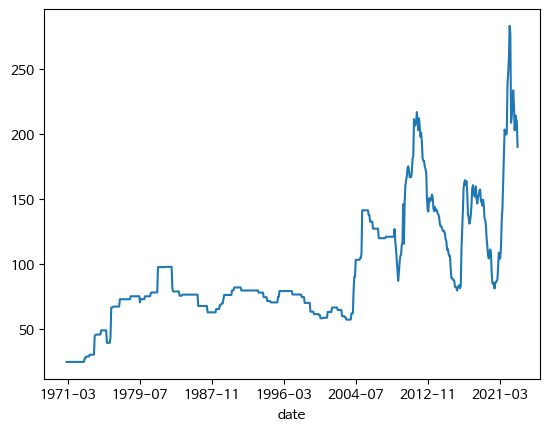

In [197]:
df2["유연탄"].plot()

<Axes: xlabel='date'>

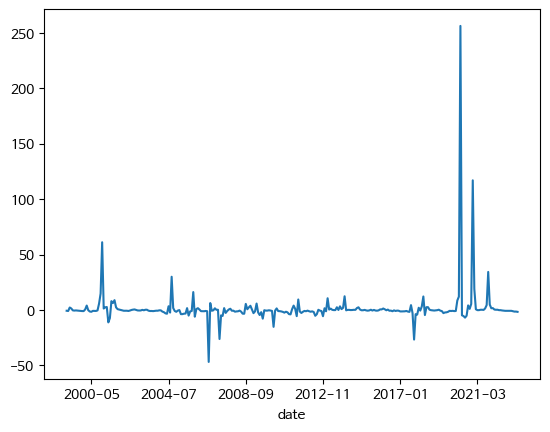

In [157]:
df2["GSCPI"].pct_change(12).plot()

<Axes: xlabel='date'>

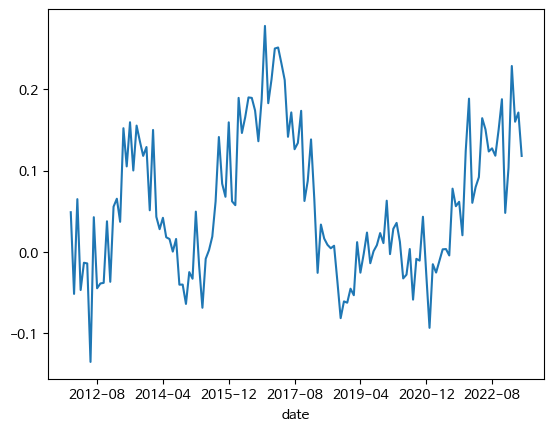

In [142]:
df2["기성총액"].tail(150).pct_change(12).plot()

<Axes: xlabel='date'>

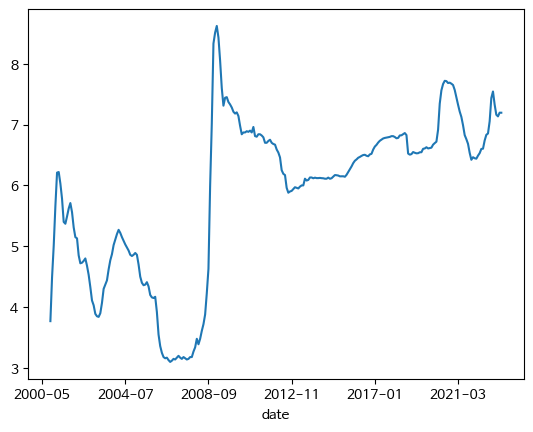

In [198]:
df2_dif["Spread"].plot()

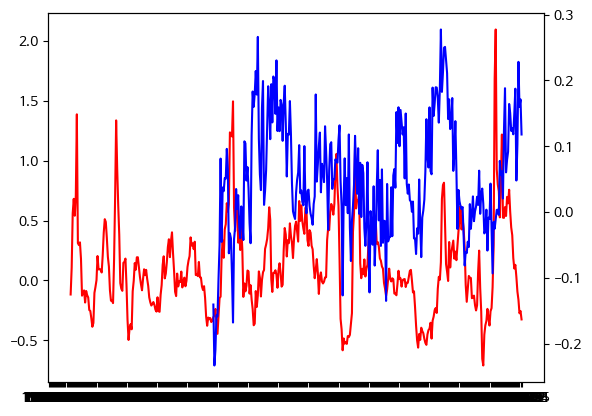

In [59]:
fig = plt.figure()

ax1 = fig.add_subplot()
ax1.plot(df2_dif.index, df2_dif["Dubai(현물)_dif"], color="red")

ax2 = ax1.twinx()
ax2.plot(df2_dif.index, df2_dif["기성총액_dif"], color="blue")

plt.show()

In [84]:
colnames = df2_dif.columns
print(colnames)

Index(['GSCPI', 'IP', 'F 건설업', '기성총액', '국고채(3년)', '회사채(3년, BBB-)', 'Dubai(현물)',
       '전국', '합계', '원/미국달러(매매기준율)', '철광석', '유연탄', 'GSCPI_dif', 'F 건설업_dif',
       '기성총액_dif', 'Dubai(현물)_dif', '전국_dif', '합계_dif', '원/미국달러(매매기준율)_dif',
       '철광석_dif', '유연탄_dif', 'Spread'],
      dtype='object')


# Lag check

In [24]:
# matplotlib 한글 폰트 셋업
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
# %config InlineBackend.figure_format = 'retina'
!apt-get update && apt -qq -y install fonts-nanum 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fm.fontManager.addfont(fontpath)  # 에전의 rebuild 대신 이걸 추가해야 설치한 폰트 추가됨
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)  # Glyph 8722 방지용

Hit:1 http://mirror.kakao.com/ubuntu jammy InRelease
Hit:2 http://mirror.kakao.com/ubuntu jammy-updates InRelease
Hit:3 http://mirror.kakao.com/ubuntu jammy-backports InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Fetched 110 kB in 2s (57.5 kB/s)   
Reading package lists... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


In [88]:
df2_dif = df2.copy()
columns_yoy = ["GSCPI", 'F 건설업', '기성총액', 'Dubai(현물)', '전국', '합계', '원/미국달러(매매기준율)', '철광석', '유연탄']

for col in columns_yoy:
    df2_dif["{:0}_dif".format(col)] = df2_dif[col].pct_change(12)
    
df2_dif.tail(3)

,GSCPI,IP,F 건설업,기성총액,국고채(3년),"회사채(3년, BBB-)",Dubai(현물),전국,합계,원/미국달러(매매기준율),...,유연탄,GSCPI_dif,F 건설업_dif,기성총액_dif,Dubai(현물)_dif,전국_dif,합계_dif,원/미국달러(매매기준율)_dif,철광석_dif,유연탄_dif
date,,,,,,,,,,,,,,,,,,,,,
2023-03,-1.167226,0.111609,2125.0,14519456.0,3.461,10.595,76.84,94.9,14203.0,1303.8,...,209.96,-1.423483,-0.009786,0.159867,-0.275163,-0.108920,-0.222605,0.076809,-0.084701,-0.149684
2023-04,-1.347554,NaN,2114.0,14859560.0,3.263,10.458,78.89,97.4,13052.0,1339.9,...,190.27,-1.395831,-0.014911,0.171164,-0.256035,-0.105601,-0.363783,0.055538,-0.133962,-0.266160
2023-05,-1.713859,NaN,2096.0,NaN,3.330,10.524,NaN,NaN,NaN,1322.2,...,NaN,-1.650773,-0.030527,0.117887,-0.326302,-0.067943,-0.372319,0.061326,-0.122274,-0.328380


In [89]:
df2_dif["Spread"] = df2_dif["회사채(3년, BBB-)"] - df2_dif["국고채(3년)"]
df2_dif.tail(3)

,GSCPI,IP,F 건설업,기성총액,국고채(3년),"회사채(3년, BBB-)",Dubai(현물),전국,합계,원/미국달러(매매기준율),...,GSCPI_dif,F 건설업_dif,기성총액_dif,Dubai(현물)_dif,전국_dif,합계_dif,원/미국달러(매매기준율)_dif,철광석_dif,유연탄_dif,Spread
date,,,,,,,,,,,,,,,,,,,,,
2023-03,-1.167226,0.111609,2125.0,14519456.0,3.461,10.595,76.84,94.9,14203.0,1303.8,...,-1.423483,-0.009786,0.159867,-0.275163,-0.108920,-0.222605,0.076809,-0.084701,-0.149684,7.134
2023-04,-1.347554,NaN,2114.0,14859560.0,3.263,10.458,78.89,97.4,13052.0,1339.9,...,-1.395831,-0.014911,0.171164,-0.256035,-0.105601,-0.363783,0.055538,-0.133962,-0.266160,7.195
2023-05,-1.713859,NaN,2096.0,NaN,3.330,10.524,NaN,NaN,NaN,1322.2,...,-1.650773,-0.030527,0.117887,-0.326302,-0.067943,-0.372319,0.061326,-0.122274,-0.328380,7.194


기성총액_dif30


<Axes: >

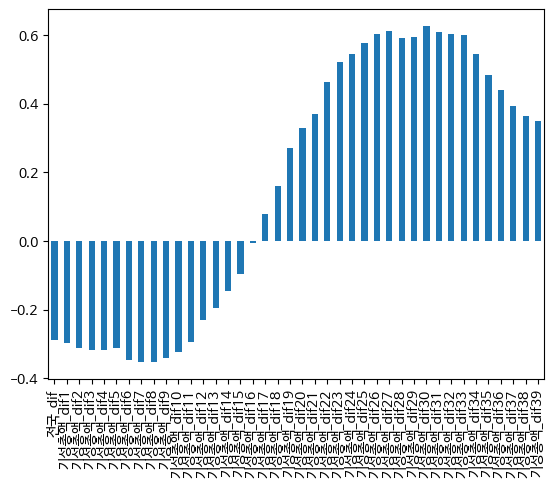

In [133]:
maxlag = 40
temp2 = df2_dif[["기성총액_dif", "전국_dif"]].copy()
for lag in range(1, maxlag):
    temp2["기성총액_dif{:0}".format(lag)] = temp2["전국_dif"].shift(lag)

temp2_corr = temp2.corr()
temp2_xcorr = temp2_corr.head(1)
i = np.argmax(abs(temp2_xcorr.values[0][1:]))
target2 = temp2_xcorr.columns[i+1]
print(target2)

temp2_xcorr.iloc[0, 1:].plot.bar()

In [90]:
df2_dif.columns

Index(['GSCPI', 'IP', 'F 건설업', '기성총액', '국고채(3년)', '회사채(3년, BBB-)', 'Dubai(현물)',
       '전국', '합계', '원/미국달러(매매기준율)', '철광석', '유연탄', 'GSCPI_dif', 'F 건설업_dif',
       '기성총액_dif', 'Dubai(현물)_dif', '전국_dif', '합계_dif', '원/미국달러(매매기준율)_dif',
       '철광석_dif', '유연탄_dif', 'Spread'],
      dtype='object')

In [91]:
drop_colnames = ['F 건설업', '국고채(3년)', '기성총액', '회사채(3년, BBB-)', 'Dubai(현물)', '전국', '합계', '원/미국달러(매매기준율)', '철광석', '유연탄']
df2_dif = df2_dif.drop(drop_colnames, axis=1)
df2_dif.columns

Index(['GSCPI', 'IP', 'GSCPI_dif', 'F 건설업_dif', '기성총액_dif', 'Dubai(현물)_dif',
       '전국_dif', '합계_dif', '원/미국달러(매매기준율)_dif', '철광석_dif', '유연탄_dif',
       'Spread'],
      dtype='object')

In [178]:
colnames = df2_dif.columns
print(colnames)

maxlag = 36
df3_36 = df2_dif[["기성총액_dif"]].copy()
colnames = colnames.drop(["기성총액_dif", "GSCPI_dif", "IP", "F 건설업_dif"], errors='ignore')

print(colnames)

for col in colnames:

    temp = df2_dif[["기성총액_dif", col]].copy()
    for lag in range(1, maxlag):
        temp["{:0}_{:1}".format(col, lag)] = temp[col].shift(lag)

    temp_corr = temp.corr()
    # print("\n")
    # print("-------------------------")
    # print(col)
    # print(temp_corr)
    temp_xcorr = temp_corr.head(1)
    i = np.argmax(temp_xcorr.abs().values[0][1:])
    target = temp_xcorr.columns[i+1]
    df3_36[target] = temp[target]

df3_36["F 건설업_dif"] = df2_dif["F 건설업_dif"]
df3_36["F 건설업_dif_1"] = df2_dif["F 건설업_dif"].shift(1)
df3_36["IP_1"] = df2_dif["IP"].shift(1)
df3_36["유연탄_dif_24"] = df2_dif["유연탄_dif"].shift(24)
df3_36["유연탄_dif_47"] = df2_dif["유연탄_dif"].shift(47)
df3_36["GSCPI_dif_1"] = df2_dif["GSCPI_dif"].shift(1)
df3_36["원/미국달러(매매기준율)_dif_6"] = df2_dif["원/미국달러(매매기준율)_dif"].shift(6)
df3_36["기성총액_dif_1"] = df2_dif["기성총액_dif"].shift(1)
df3_36["기성총액_dif_2"] = df2_dif["기성총액_dif"].shift(2)
df3_36["기성총액_dif_3"] = df2_dif["기성총액_dif"].shift(3)


df3_36 = df3_36.drop("유연탄_dif", axis=1)
print(df3_36.columns)
df3_36.tail(3)

Index(['GSCPI', 'IP', 'GSCPI_dif', 'F 건설업_dif', '기성총액_dif', 'Dubai(현물)_dif',
       '전국_dif', '합계_dif', '원/미국달러(매매기준율)_dif', '철광석_dif', '유연탄_dif',
       'Spread'],
      dtype='object')
Index(['GSCPI', 'Dubai(현물)_dif', '전국_dif', '합계_dif', '원/미국달러(매매기준율)_dif',
       '철광석_dif', '유연탄_dif', 'Spread'],
      dtype='object')
Index(['기성총액_dif', 'GSCPI_17', 'Dubai(현물)_dif_15', '전국_dif_30', '합계_dif_18',
       '원/미국달러(매매기준율)_dif_24', '철광석_dif_14', 'Spread_6', 'F 건설업_dif',
       'F 건설업_dif_1', 'IP_1', '유연탄_dif_24', '유연탄_dif_47', 'GSCPI_dif_1',
       '원/미국달러(매매기준율)_dif_6', '기성총액_dif_1', '기성총액_dif_2', '기성총액_dif_3'],
      dtype='object')


,기성총액_dif,GSCPI_17,Dubai(현물)_dif_15,전국_dif_30,합계_dif_18,원/미국달러(매매기준율)_dif_24,철광석_dif_14,Spread_6,F 건설업_dif,F 건설업_dif_1,IP_1,유연탄_dif_24,유연탄_dif_47,GSCPI_dif_1,원/미국달러(매매기준율)_dif_6,기성총액_dif_1,기성총액_dif_2,기성총액_dif_3
date,,,,,,,,,,,,,,,,,,
2023-03,0.159867,3.805138,0.522596,0.117159,-0.150597,-0.072877,-0.067173,6.853,-0.009786,-0.001412,0.586011,-0.046164,-0.018120,-1.111125,0.210904,0.228275,0.103287,0.047968
2023-04,0.171164,4.218441,0.612564,0.137533,-0.000981,-0.096148,-0.187431,7.053,-0.014911,-0.009786,0.111609,0.120830,-0.041384,-1.423483,0.211317,0.159867,0.228275,0.103287
2023-05,0.117887,4.305202,0.538535,0.151224,0.065685,-0.099564,-0.186375,7.436,-0.030527,-0.014911,NaN,0.327850,-0.153317,-1.395831,0.115720,0.171164,0.159867,0.228275


In [331]:
# df3.to_csv("../DATA/merged_difwithlags_datas.csv")

# 변수 이름 변경

CRA: 건설기성, GSCPI: 공급망압력지수, IP: 세계산업생산지수, TB3: 국고채(3년), CBBB: 회사채(BBB-, 3년), Oil: 두바이유, EXR: 환율, Steal: 철강, Coal: 유연탄, CRA_1: 건설기성(1기 lag), Spread: 회사채-국고채 스프레드, RES: 부동산 심리지수, CPA: 건축허가면적, EMP: 건설 취업자수

In [179]:
df4 = df3_36.copy()
df4.tail(3)

,기성총액_dif,GSCPI_17,Dubai(현물)_dif_15,전국_dif_30,합계_dif_18,원/미국달러(매매기준율)_dif_24,철광석_dif_14,Spread_6,F 건설업_dif,F 건설업_dif_1,IP_1,유연탄_dif_24,유연탄_dif_47,GSCPI_dif_1,원/미국달러(매매기준율)_dif_6,기성총액_dif_1,기성총액_dif_2,기성총액_dif_3
date,,,,,,,,,,,,,,,,,,
2023-03,0.159867,3.805138,0.522596,0.117159,-0.150597,-0.072877,-0.067173,6.853,-0.009786,-0.001412,0.586011,-0.046164,-0.018120,-1.111125,0.210904,0.228275,0.103287,0.047968
2023-04,0.171164,4.218441,0.612564,0.137533,-0.000981,-0.096148,-0.187431,7.053,-0.014911,-0.009786,0.111609,0.120830,-0.041384,-1.423483,0.211317,0.159867,0.228275,0.103287
2023-05,0.117887,4.305202,0.538535,0.151224,0.065685,-0.099564,-0.186375,7.436,-0.030527,-0.014911,NaN,0.327850,-0.153317,-1.395831,0.115720,0.171164,0.159867,0.228275


In [171]:
columns_origin = df4.columns
columns_origin

Index(['기성총액_dif', 'GSCPI_17', 'Dubai(현물)_dif_15', '전국_dif_30', '합계_dif_18',
       '원/미국달러(매매기준율)_dif_24', '철광석_dif_14', 'Spread_6', 'F 건설업_dif',
       'F 건설업_dif_1', 'IP_1', '유연탄_dif_24', '유연탄_dif_47', 'GSCPI_dif_1',
       '원/미국달러(매매기준율)_dif_6', '기성총액_dif_1', '기성총액_dif_2'],
      dtype='object')

In [180]:
columns_origin = df4.columns
columns_change = ["CRA_dif", "GSCPI_17", "Oil_dif_15", "RES_dif_30", "CPA_dif_30", "EXR_dif_24", "Steal_dif_14", "Spread_6", "EMP_dif_0", "EMP_dif_1", "IP_1", 
                  "Coal_dif_24", "Coal_dif_47", "GSCPI_dif_1", "EXR_dif_6", "CRA_dif_1", "CRA_dif_2", "CRA_dif_3"]

df4_full = pd.DataFrame()

for num in range(len(columns_change)):
    df4_full[columns_change[num]] = df4[columns_origin[num]].copy()

df4_full.tail(3)

,CRA_dif,GSCPI_17,Oil_dif_15,RES_dif_30,CPA_dif_30,EXR_dif_24,Steal_dif_14,Spread_6,EMP_dif_0,EMP_dif_1,IP_1,Coal_dif_24,Coal_dif_47,GSCPI_dif_1,EXR_dif_6,CRA_dif_1,CRA_dif_2,CRA_dif_3
date,,,,,,,,,,,,,,,,,,
2023-03,0.159867,3.805138,0.522596,0.117159,-0.150597,-0.072877,-0.067173,6.853,-0.009786,-0.001412,0.586011,-0.046164,-0.018120,-1.111125,0.210904,0.228275,0.103287,0.047968
2023-04,0.171164,4.218441,0.612564,0.137533,-0.000981,-0.096148,-0.187431,7.053,-0.014911,-0.009786,0.111609,0.120830,-0.041384,-1.423483,0.211317,0.159867,0.228275,0.103287
2023-05,0.117887,4.305202,0.538535,0.151224,0.065685,-0.099564,-0.186375,7.436,-0.030527,-0.014911,NaN,0.327850,-0.153317,-1.395831,0.115720,0.171164,0.159867,0.228275


In [181]:
df4_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 1960-01 to 2023-05
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CRA_dif       299 non-null    float64
 1   GSCPI_17      288 non-null    float64
 2   Oil_dif_15    422 non-null    float64
 3   RES_dif_30    101 non-null    float64
 4   CPA_dif_30    119 non-null    float64
 5   EXR_dif_24    673 non-null    float64
 6   Steal_dif_14  603 non-null    float64
 7   Spread_6      266 non-null    float64
 8   EMP_dif_0     113 non-null    float64
 9   EMP_dif_1     112 non-null    float64
 10  IP_1          578 non-null    float64
 11  Coal_dif_24   593 non-null    float64
 12  Coal_dif_47   570 non-null    float64
 13  GSCPI_dif_1   292 non-null    float64
 14  EXR_dif_6     691 non-null    float64
 15  CRA_dif_1     298 non-null    float64
 16  CRA_dif_2     297 non-null    float64
 17  CRA_dif_3     296 non-null    float64
dtypes: float64(18)
memory usa

## 장기시계 (2001-04 ~ 2023-05)

In [182]:
df4_long = df4_full.copy()
df4_long = df4_long.drop(["RES_dif_30", "CPA_dif_30", "EMP_dif_0", "EMP_dif_1"], axis=1)
df4_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 1960-01 to 2023-05
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CRA_dif       299 non-null    float64
 1   GSCPI_17      288 non-null    float64
 2   Oil_dif_15    422 non-null    float64
 3   EXR_dif_24    673 non-null    float64
 4   Steal_dif_14  603 non-null    float64
 5   Spread_6      266 non-null    float64
 6   IP_1          578 non-null    float64
 7   Coal_dif_24   593 non-null    float64
 8   Coal_dif_47   570 non-null    float64
 9   GSCPI_dif_1   292 non-null    float64
 10  EXR_dif_6     691 non-null    float64
 11  CRA_dif_1     298 non-null    float64
 12  CRA_dif_2     297 non-null    float64
 13  CRA_dif_3     296 non-null    float64
dtypes: float64(14)
memory usage: 85.2+ KB


In [183]:
df_long = df4_long.tail(266)
df_long

,CRA_dif,GSCPI_17,Oil_dif_15,EXR_dif_24,Steal_dif_14,Spread_6,IP_1,Coal_dif_24,Coal_dif_47,GSCPI_dif_1,EXR_dif_6,CRA_dif_1,CRA_dif_2,CRA_dif_3
date,,,,,,,,,,,,,,
2001-04,0.068294,-0.055737,1.203125,-0.120909,0.000000,3.770,-0.593830,-0.150074,-0.033670,2.728668,-0.053145,0.047867,0.104524,0.107514
2001-05,0.036097,-0.017705,1.496545,-0.159130,0.000000,4.490,-0.771854,-0.150074,-0.033670,-11.156400,0.032657,0.068294,0.047867,0.104524
2001-06,-0.016663,-0.476082,0.607046,-0.165536,0.050495,5.010,-0.186287,-0.150074,-0.033670,-7.284505,0.099790,0.036097,0.068294,0.047867
2001-07,-0.047327,-0.279060,0.412020,-0.023544,0.050495,5.660,-0.219864,-0.150074,-0.033670,8.002749,0.127796,-0.016663,0.036097,0.068294
2001-08,0.116565,-0.250975,0.717845,-0.110302,0.050495,6.210,-1.107050,-0.096181,-0.033670,6.347302,0.100636,-0.047327,-0.016663,0.036097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01,0.103287,3.244662,1.219393,-0.058217,-0.107701,6.738,-0.556595,-0.100420,-0.073717,-0.717083,0.136482,0.047968,0.187505,0.150175
2023-02,0.228275,3.272747,0.524597,-0.088412,-0.009324,6.831,-0.340898,-0.022284,-0.068212,-0.729973,0.157248,0.103287,0.047968,0.187505
2023-03,0.159867,3.805138,0.522596,-0.072877,-0.067173,6.853,0.586011,-0.046164,-0.018120,-1.111125,0.210904,0.228275,0.103287,0.047968


In [274]:
mod = smf.ols(formula="CRA_dif ~ CRA_dif_1 + Oil_dif_15 + Steal_dif_14 + Coal_dif_24 + GSCPI_dif_1 + Spread_6 + EXR_dif_24", data=df_long)
res = mod.fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                CRA_dif   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     38.70
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           6.89e-37
Time:                        06:28:31   Log-Likelihood:                 391.89
No. Observations:                 266   AIC:                            -767.8
Df Residuals:                     258   BIC:                            -739.1
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0590      0.020      3.022   

In [194]:
mod = smf.ols(formula="CRA_dif ~ CRA_dif_1 + CRA_dif_2 + CRA_dif_3 + GSCPI_17 + IP_1 + Spread_6 + Oil_dif_15 + EXR_dif_24 + Steal_dif_14 + Coal_dif_24", data=df_long)
res = mod.fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                CRA_dif   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     34.35
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           8.59e-42
Time:                        13:26:11   Log-Likelihood:                 399.38
No. Observations:                 265   AIC:                            -776.8
Df Residuals:                     254   BIC:                            -737.4
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0471      0.021      2.198   

In [160]:
mod = smf.ols(formula="CRA_dif ~ CRA_dif_1 + Spread_6 + GSCPI_17 + Oil_dif_15 + Steal_dif_14 + Coal_dif_24", data=df_long)
res = mod.fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                CRA_dif   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     44.26
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           4.52e-37
Time:                        12:56:29   Log-Likelihood:                 390.02
No. Observations:                 266   AIC:                            -766.0
Df Residuals:                     259   BIC:                            -741.0
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0759      0.021      3.588   

## 단기시계(2015.01 ~ 2023.05)

In [199]:
df4_short = df4_full.copy()
df4_short.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 1960-01 to 2023-05
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CRA_dif       299 non-null    float64
 1   GSCPI_17      288 non-null    float64
 2   Oil_dif_15    422 non-null    float64
 3   RES_dif_30    101 non-null    float64
 4   CPA_dif_30    119 non-null    float64
 5   EXR_dif_24    673 non-null    float64
 6   Steal_dif_14  603 non-null    float64
 7   Spread_6      266 non-null    float64
 8   EMP_dif_0     113 non-null    float64
 9   EMP_dif_1     112 non-null    float64
 10  IP_1          578 non-null    float64
 11  Coal_dif_24   593 non-null    float64
 12  Coal_dif_47   570 non-null    float64
 13  GSCPI_dif_1   292 non-null    float64
 14  EXR_dif_6     691 non-null    float64
 15  CRA_dif_1     298 non-null    float64
 16  CRA_dif_2     297 non-null    float64
 17  CRA_dif_3     296 non-null    float64
dtypes: float64(18)
memory usa

In [200]:
df_short = df4_short.tail(101)
df_short.head(3)

,CRA_dif,GSCPI_17,Oil_dif_15,RES_dif_30,CPA_dif_30,EXR_dif_24,Steal_dif_14,Spread_6,EMP_dif_0,EMP_dif_1,IP_1,Coal_dif_24,Coal_dif_47,GSCPI_dif_1,EXR_dif_6,CRA_dif_1,CRA_dif_2,CRA_dif_3
date,,,,,,,,,,,,,,,,,,
2015-01,-0.032831,-0.524097,0.000842,-0.196016,0.032533,-0.037600,0.011906,6.110,0.040563,0.046328,0.529458,-0.239009,0.565428,-0.233371,-0.080190,-0.024709,-0.063744,-0.040024
2015-02,0.049530,-0.283561,0.008617,-0.188607,0.072256,-0.036485,0.011906,6.110,0.037619,0.040563,-0.232292,-0.262472,0.236773,-0.192478,-0.087587,-0.032831,-0.024709,-0.063744
2015-03,-0.017032,-0.159872,0.011437,-0.132856,0.032954,-0.022587,0.188869,6.128,0.043673,0.037619,0.016654,-0.231508,0.319554,0.109596,-0.023243,0.049530,-0.032831,-0.024709


In [276]:
mod = smf.ols(formula="CRA_dif ~ CRA_dif_1 + Oil_dif_15 + Steal_dif_14 + Coal_dif_24 + GSCPI_dif_1 + Spread_6 + EXR_dif_24 + CPA_dif_30 + EMP_dif_1 + RES_dif_30", data=df_short)
res = mod.fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                CRA_dif   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     31.24
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           4.27e-25
Time:                        06:34:52   Log-Likelihood:                 175.51
No. Observations:                 101   AIC:                            -329.0
Df Residuals:                      90   BIC:                            -300.2
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0256      0.098     -0.261   

In [208]:
mod = smf.ols(formula="CRA_dif ~ CRA_dif_1 + CRA_dif_2 + CRA_dif_3 + GSCPI_17 + Spread_6 + EXR_dif_24 + Oil_dif_15 + Steal_dif_14 + Coal_dif_24 + RES_dif_30 + CPA_dif_30 + EMP_dif_1", data=df_short)
res = mod.fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                CRA_dif   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     36.87
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           3.72e-29
Time:                        15:39:50   Log-Likelihood:                 183.49
No. Observations:                 101   AIC:                            -341.0
Df Residuals:                      88   BIC:                            -307.0
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0925      0.111      0.830   

## 지수 포함

In [260]:
from datetime import datetime

df_index = pd.read_csv("../DATA_text/lag_model_fit_predict_probas.csv", index_col=0)
df_index

,5,12,16
2017-06-30,0.88,NaN,NaN
2017-07-31,0.94,NaN,NaN
2017-08-31,0.94,NaN,NaN
2017-09-30,0.95,NaN,NaN
2017-10-31,0.91,NaN,NaN
...,...,...,...
2024-05-31,NaN,0.71,0.73
2024-06-30,NaN,NaN,0.64
2024-07-31,NaN,NaN,0.75
2024-08-31,NaN,NaN,0.70


In [261]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 2017-06-30 to 2024-09-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5       77 non-null     float64
 1   12      77 non-null     float64
 2   16      77 non-null     float64
dtypes: float64(3)
memory usage: 2.8+ KB


In [262]:
df_index.index = pd.to_datetime(df_index.index).strftime("%Y-%m")
df_index

,5,12,16
2017-06,0.88,NaN,NaN
2017-07,0.94,NaN,NaN
2017-08,0.94,NaN,NaN
2017-09,0.95,NaN,NaN
2017-10,0.91,NaN,NaN
...,...,...,...
2024-05,NaN,0.71,0.73
2024-06,NaN,NaN,0.64
2024-07,NaN,NaN,0.75
2024-08,NaN,NaN,0.70


In [263]:
df_index.columns

Index(['5', '12', '16'], dtype='object')

In [264]:
df_index["5"]

2017-06    0.88
2017-07    0.94
2017-08    0.94
2017-09    0.95
2017-10    0.91
           ... 
2024-05     NaN
2024-06     NaN
2024-07     NaN
2024-08     NaN
2024-09     NaN
Name: 5, Length: 88, dtype: float64

In [265]:
df_short_index = df_short.copy()
df_short_index["index_5"] = df_index["5"]
df_short_index["index_12"] = df_index["12"]
df_short_index["index_16"] = df_index["16"]

df_short_index

,CRA_dif,GSCPI_17,Oil_dif_15,RES_dif_30,CPA_dif_30,EXR_dif_24,Steal_dif_14,Spread_6,EMP_dif_0,EMP_dif_1,...,Coal_dif_24,Coal_dif_47,GSCPI_dif_1,EXR_dif_6,CRA_dif_1,CRA_dif_2,CRA_dif_3,index_5,index_12,index_16
date,,,,,,,,,,,,,,,,,,,,,
2015-01,-0.032831,-0.524097,0.000842,-0.196016,0.032533,-0.037600,0.011906,6.110,0.040563,0.046328,...,-0.239009,0.565428,-0.233371,-0.080190,-0.024709,-0.063744,-0.040024,NaN,NaN,NaN
2015-02,0.049530,-0.283561,0.008617,-0.188607,0.072256,-0.036485,0.011906,6.110,0.037619,0.040563,...,-0.262472,0.236773,-0.192478,-0.087587,-0.032831,-0.024709,-0.063744,NaN,NaN,NaN
2015-03,-0.017032,-0.159872,0.011437,-0.132856,0.032954,-0.022587,0.188869,6.128,0.043673,0.037619,...,-0.231508,0.319554,0.109596,-0.023243,0.049530,-0.032831,-0.024709,NaN,NaN,NaN
2015-04,-0.068471,-0.658786,-0.055405,-0.043814,0.104616,-0.023012,0.205483,6.109,0.034864,0.043673,...,-0.166703,0.256254,-0.358467,-0.006972,-0.017032,0.049530,-0.032831,NaN,NaN,NaN
2015-05,-0.008392,-0.483383,-0.018278,-0.020314,-0.031752,-0.042028,0.205483,6.118,0.021346,0.034864,...,-0.144990,0.236358,-0.583755,0.036720,-0.068471,-0.017032,0.049530,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01,0.103287,3.244662,1.219393,0.191740,-0.003716,-0.058217,-0.107701,6.738,-0.018388,-0.004294,...,-0.100420,-0.073717,-0.717083,0.136482,0.047968,0.187505,0.150175,0.96,0.97,0.95
2023-02,0.228275,3.272747,0.524597,0.162319,0.038981,-0.088412,-0.009324,6.831,-0.001412,-0.018388,...,-0.022284,-0.068212,-0.729973,0.157248,0.103287,0.047968,0.187505,0.96,0.91,0.95
2023-03,0.159867,3.805138,0.522596,0.117159,-0.150597,-0.072877,-0.067173,6.853,-0.009786,-0.001412,...,-0.046164,-0.018120,-1.111125,0.210904,0.228275,0.103287,0.047968,0.94,0.94,0.94


In [266]:
df_short_index.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 2015-01 to 2023-05
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CRA_dif       101 non-null    float64
 1   GSCPI_17      101 non-null    float64
 2   Oil_dif_15    101 non-null    float64
 3   RES_dif_30    101 non-null    float64
 4   CPA_dif_30    101 non-null    float64
 5   EXR_dif_24    101 non-null    float64
 6   Steal_dif_14  101 non-null    float64
 7   Spread_6      101 non-null    float64
 8   EMP_dif_0     101 non-null    float64
 9   EMP_dif_1     101 non-null    float64
 10  IP_1          100 non-null    float64
 11  Coal_dif_24   101 non-null    float64
 12  Coal_dif_47   101 non-null    float64
 13  GSCPI_dif_1   101 non-null    float64
 14  EXR_dif_6     101 non-null    float64
 15  CRA_dif_1     101 non-null    float64
 16  CRA_dif_2     101 non-null    float64
 17  CRA_dif_3     101 non-null    float64
 18  index_5       72 non-null

In [ ]:
df_short_index = df_short_index.tail(72)

In [290]:
mod12 = smf.ols(formula="CRA_dif ~ CRA_dif_1 + Oil_dif_15 + Steal_dif_14 + Coal_dif_24 + GSCPI_17 + EXR_dif_24 + CPA_dif_30 + RES_dif_30 + index_12", data=df_short_index.tail(65))
res12 = mod12.fit(cov_type='HC3')
print(res12.summary())

                            OLS Regression Results                            
Dep. Variable:                CRA_dif   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     24.59
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           3.07e-16
Time:                        06:51:25   Log-Likelihood:                 137.36
No. Observations:                  65   AIC:                            -254.7
Df Residuals:                      55   BIC:                            -233.0
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0185      0.012     -1.494   

---------------------

# Prediction

In [296]:
res12.params

Intercept      -0.018500
CRA_dif_1       0.132203
Oil_dif_15     -0.044390
Steal_dif_14    0.009843
Coal_dif_24    -0.001509
GSCPI_17        0.013800
EXR_dif_24      0.041576
CPA_dif_30      0.022458
RES_dif_30      0.364221
index_12        0.074434
dtype: float64

In [321]:
df_index12 = df_index.tail(17).head(12)
df_index12["index_12"] = df_index12[["12"]]
df_index12

,5,12,16,index_12
2023-05,0.84,0.75,0.84,0.75
2023-06,0.87,0.80,0.73,0.80
2023-07,0.82,0.85,0.75,0.85
2023-08,0.79,0.84,0.75,0.84
2023-09,0.82,0.79,0.82,0.79
2023-10,0.83,0.79,0.72,0.79
2023-11,NaN,0.81,0.79,0.81
2023-12,NaN,0.85,0.73,0.85
2024-01,NaN,0.72,0.81,0.72
2024-02,NaN,0.75,0.72,0.75


In [319]:
df_predict = df_short_index[["CRA_dif", "CRA_dif_1", "Oil_dif_15", "Steal_dif_14", "Coal_dif_24", "GSCPI_17", "EXR_dif_24", "CPA_dif_30", "RES_dif_30", "index_12"]]
df_predict = sm.add_constant(df_predict)
df_predict

,const,CRA_dif,CRA_dif_1,Oil_dif_15,Steal_dif_14,Coal_dif_24,GSCPI_17,EXR_dif_24,CPA_dif_30,RES_dif_30,index_12
date,,,,,,,,,,,
2015-01,1.0,-0.032831,-0.024709,0.000842,0.011906,-0.239009,-0.524097,-0.037600,0.032533,-0.196016,NaN
2015-02,1.0,0.049530,-0.032831,0.008617,0.011906,-0.262472,-0.283561,-0.036485,0.072256,-0.188607,NaN
2015-03,1.0,-0.017032,0.049530,0.011437,0.188869,-0.231508,-0.159872,-0.022587,0.032954,-0.132856,NaN
2015-04,1.0,-0.068471,-0.017032,-0.055405,0.205483,-0.166703,-0.658786,-0.023012,0.104616,-0.043814,NaN
2015-05,1.0,-0.008392,-0.068471,-0.018278,0.205483,-0.144990,-0.483383,-0.042028,-0.031752,-0.020314,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-01,1.0,0.103287,0.047968,1.219393,-0.107701,-0.100420,3.244662,-0.058217,-0.003716,0.191740,0.97
2023-02,1.0,0.228275,0.103287,0.524597,-0.009324,-0.022284,3.272747,-0.088412,0.038981,0.162319,0.91
2023-03,1.0,0.159867,0.228275,0.522596,-0.067173,-0.046164,3.805138,-0.072877,-0.150597,0.117159,0.94


In [320]:
df_predict = pd.concat([df_predict, df_index12], axis=1)
df_predict

,const,CRA_dif,CRA_dif_1,Oil_dif_15,Steal_dif_14,Coal_dif_24,GSCPI_17,EXR_dif_24,CPA_dif_30,RES_dif_30,index_12,index_12
2015-01,1.0,-0.032831,-0.024709,0.000842,0.011906,-0.239009,-0.524097,-0.037600,0.032533,-0.196016,NaN,NaN
2015-02,1.0,0.049530,-0.032831,0.008617,0.011906,-0.262472,-0.283561,-0.036485,0.072256,-0.188607,NaN,NaN
2015-03,1.0,-0.017032,0.049530,0.011437,0.188869,-0.231508,-0.159872,-0.022587,0.032954,-0.132856,NaN,NaN
2015-04,1.0,-0.068471,-0.017032,-0.055405,0.205483,-0.166703,-0.658786,-0.023012,0.104616,-0.043814,NaN,NaN
2015-05,1.0,-0.008392,-0.068471,-0.018278,0.205483,-0.144990,-0.483383,-0.042028,-0.031752,-0.020314,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85
2024-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.72
2024-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75
2024-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.79


In [343]:
df2_dif.index
dates = pd.date_range(start="1960-01", end="2024-05", freq="M").strftime("%Y-%m")
temp = pd.DataFrame(index=dates)
temp.index.name = "date"
temp.loc[df2_dif.index, df2_dif.columns] = df2_dif.copy()

temp["CRA_dif_1"] = temp["기성총액_dif"].shift(1)
temp["Oil_dif_15"] = temp["Dubai(현물)_dif"].shift(15)
temp["Steal_dif_14"] = temp["철광석_dif"].shift(14)
temp["Coal_dif_24"] = temp["유연탄_dif"].shift(24)
temp["GSCPI_17"] = temp["GSCPI_dif"].shift(17)
temp["EXR_dif_24"] = temp["원/미국달러(매매기준율)_dif"].shift(24)
temp["CPA_dif_30"] = temp["합계_dif"].shift(30)
temp["RES_dif_30"] = temp["전국_dif"].shift(30)
temp["index_12"] = df_index12["index_12"]

df_predict = temp[["CRA_dif_1", "Oil_dif_15", "Steal_dif_14", "Coal_dif_24", "GSCPI_17", "EXR_dif_24", "CPA_dif_30", 
                   "RES_dif_30", "index_12"]]
df_predict = sm.add_constant(df_predict)
df_predict.tail()

,const,CRA_dif_1,Oil_dif_15,Steal_dif_14,Coal_dif_24,GSCPI_17,EXR_dif_24,CPA_dif_30,RES_dif_30,index_12
date,,,,,,,,,,
1960-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-02,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-04,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-05,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12,1.0,NaN,0.187088,-0.396010,1.265600,-0.401116,0.089614,0.059903,0.041597,0.85
2024-01,1.0,NaN,0.098853,-0.134788,1.039309,-0.556306,0.078773,-0.003716,0.042904,0.72
2024-02,1.0,NaN,0.130196,-0.305713,1.191067,-0.726856,0.085078,0.038981,0.062344,0.75


In [346]:
df_predict = df_predict.tail(12)
df_predict

,const,CRA_dif_1,Oil_dif_15,Steal_dif_14,Coal_dif_24,GSCPI_17,EXR_dif_24,CPA_dif_30,RES_dif_30,index_12
date,,,,,,,,,,
2023-05,1.0,0.171164,0.538535,-0.186375,0.327850,1.610212,-0.099564,-0.044628,0.151224,0.75
2023-06,1.0,0.117887,0.698062,-0.161229,0.582132,1.714642,-0.058882,0.029024,0.117235,0.80
2023-07,1.0,NaN,0.644286,-0.260226,0.671379,0.432446,-0.036931,0.025327,0.108850,0.85
2023-08,1.0,NaN,0.757730,-0.266362,1.018466,0.250316,-0.017467,-0.094311,0.064711,0.84
2023-09,1.0,NaN,0.575853,-0.374901,1.182812,0.262103,0.009715,0.086378,0.122430,0.79
2023-10,1.0,NaN,0.442990,-0.393844,1.365411,-0.122423,0.033792,0.247180,0.142580,0.79
2023-11,1.0,NaN,0.377794,-0.339512,1.302703,-0.143521,0.080587,0.163283,0.108379,0.81
2023-12,1.0,NaN,0.187088,-0.396010,1.265600,-0.401116,0.089614,0.059903,0.041597,0.85
2024-01,1.0,NaN,0.098853,-0.134788,1.039309,-0.556306,0.078773,-0.003716,0.042904,0.72


In [349]:
col_temp = pd.DataFrame({'CRA_dif_1' : [0.171164, 
                                        0.117887, 
                                        0.08774508, 
                                        0.068841253, 
                                        0.039510501, 
                                        0.065041525, 
                                        0.080497504, 
                                        0.074866493, 
                                        0.055240115, 
                                        0.046253396, 
                                        0.049943504, 
                                        0.048224256]})

col_temp.index = pd.to_datetime(df_predict.index).strftime("%Y-%m")
df_predict['CRA_dif_1'] = col_temp
df_predict

,const,CRA_dif_1,Oil_dif_15,Steal_dif_14,Coal_dif_24,GSCPI_17,EXR_dif_24,CPA_dif_30,RES_dif_30,index_12
date,,,,,,,,,,
2023-05,1.0,0.171164,0.538535,-0.186375,0.327850,1.610212,-0.099564,-0.044628,0.151224,0.75
2023-06,1.0,0.117887,0.698062,-0.161229,0.582132,1.714642,-0.058882,0.029024,0.117235,0.80
2023-07,1.0,0.087745,0.644286,-0.260226,0.671379,0.432446,-0.036931,0.025327,0.108850,0.85
2023-08,1.0,0.068841,0.757730,-0.266362,1.018466,0.250316,-0.017467,-0.094311,0.064711,0.84
2023-09,1.0,0.039511,0.575853,-0.374901,1.182812,0.262103,0.009715,0.086378,0.122430,0.79
2023-10,1.0,0.065042,0.442990,-0.393844,1.365411,-0.122423,0.033792,0.247180,0.142580,0.79
2023-11,1.0,0.080498,0.377794,-0.339512,1.302703,-0.143521,0.080587,0.163283,0.108379,0.81
2023-12,1.0,0.074866,0.187088,-0.396010,1.265600,-0.401116,0.089614,0.059903,0.041597,0.85
2024-01,1.0,0.055240,0.098853,-0.134788,1.039309,-0.556306,0.078773,-0.003716,0.042904,0.72


In [351]:
df_short_index[["CRA_dif"]]

,CRA_dif
date,
2015-01,-0.032831
2015-02,0.049530
2015-03,-0.017032
2015-04,-0.068471
2015-05,-0.008392
...,...
2023-01,0.103287
2023-02,0.228275
2023-03,0.159867


date
2023-05    0.105879
2023-06    0.087747
2023-07    0.068842
2023-08    0.039512
2023-09    0.065043
2023-10    0.080499
2023-11    0.074868
2023-12    0.055241
2024-01    0.046254
2024-02    0.049944
2024-03    0.048225
2024-04    0.016415
dtype: float64


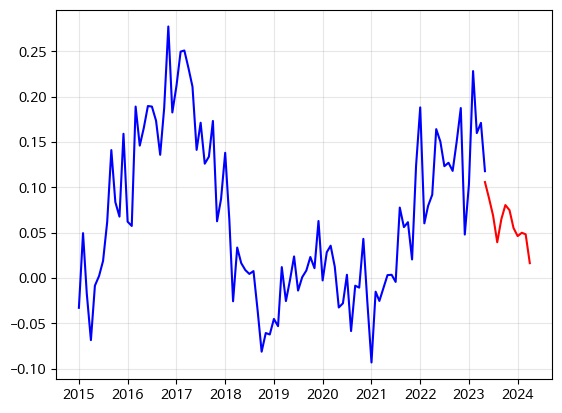

In [373]:
X = df_predict
y = df_short_index[["CRA_dif"]]

ypred = res12.predict(X)
print(ypred)

y.index = pd.to_datetime(y.index, format="%Y-%m")
ypred.index = pd.to_datetime(ypred.index, format="%Y-%m")

fig, ax = plt.subplots()
ax.plot(y["CRA_dif"], "b", label="True value")
ax.plot(ypred, "r", label="Prediction with NEWs Index")
ax.grid(alpha=0.3)

In [394]:
df_yfull = pd.DataFrame()
df_yfull['CRA_dif'] = df2[["기성총액"]].pct_change(12).tail(299)
df_yfull

,CRA_dif
date,
1998-07,-0.140519
1998-08,-0.233118
1998-09,-0.209151
1998-10,-0.156918
1998-11,-0.158606
...,...
2023-01,0.103287
2023-02,0.228275
2023-03,0.159867


In [395]:
df_ypred = pd.DataFrame(data=ypred, columns=['CRA_dif'], index=ypred.index)
df_ypred.index = pd.to_datetime(df_ypred.index).strftime("%Y-%m")

y_full = pd.concat([df_yfull[["CRA_dif"]], df_ypred], axis=0)
y_full

,CRA_dif
date,
1998-07,-0.140519
1998-08,-0.233118
1998-09,-0.209151
1998-10,-0.156918
1998-11,-0.158606
...,...
2023-12,0.055241
2024-01,0.046254
2024-02,0.049944


In [396]:
cycle, trend = sm.tsa.filters.hpfilter(y_full, lamb=14400)
cycle

date
1998-07   -0.021695
1998-08   -0.121113
1998-09   -0.103962
1998-10   -0.058534
1998-11   -0.067000
             ...   
2023-12   -0.035081
2024-01   -0.043020
2024-02   -0.038260
2024-03   -0.038897
2024-04   -0.069619
Name: cycle, Length: 311, dtype: float64

In [397]:
y["CRA_dif"].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 101 entries, 2015-01-01 to 2023-05-01
Series name: CRA_dif
Non-Null Count  Dtype  
--------------  -----  
101 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


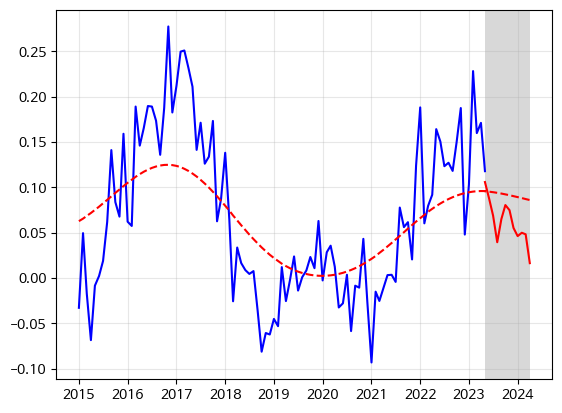

In [403]:
trend.index = pd.to_datetime(trend.index, format="%Y-%m")

fig, ax = plt.subplots()
ax.plot(y["CRA_dif"], "b", label="True value")
ax.plot(ypred, "r", label="Prediction with NEWs Index")
ax.plot(trend.tail(113), "--r", label="Predicted Cycle")

ax.grid(alpha=0.3)

plt.axvspan("2023-05", "2024-04", facecolor="gray", alpha=0.3)

-------------

-------------

-------------

In [291]:
mod12e = smf.ols(formula="CRA_dif ~ CRA_dif_1 + Oil_dif_15 + Steal_dif_14 + Coal_dif_24 + GSCPI_17 + EXR_dif_24 + CPA_dif_30 + RES_dif_30", data=df_short_index.tail(65))
res12e = mod12e.fit(cov_type='HC3')
print(res12e.summary())

                            OLS Regression Results                            
Dep. Variable:                CRA_dif   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     20.12
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           6.47e-14
Time:                        06:52:29   Log-Likelihood:                 126.79
No. Observations:                  65   AIC:                            -235.6
Df Residuals:                      56   BIC:                            -216.0
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0271      0.012      2.236   

In [252]:
df_index2 = pd.read_csv("../DATA_text/lag_model_fit_predict_probas_202201.csv", index_col=0)
df_index2.index = pd.to_datetime(df_index2.index).strftime("%Y-%m")
df_index2

,3,5,12,16
2017-04,0.86,NaN,NaN,NaN
2017-05,0.92,NaN,NaN,NaN
2017-06,0.93,0.83,NaN,NaN
2017-07,0.93,0.93,NaN,NaN
2017-08,0.92,0.91,NaN,NaN
...,...,...,...,...
2024-05,NaN,NaN,0.47,0.47
2024-06,NaN,NaN,NaN,0.54
2024-07,NaN,NaN,NaN,0.50
2024-08,NaN,NaN,NaN,0.42


In [256]:
df_short_index2 = df_short.copy()
df_short_index2["index_5"] = df_index2["5"]
df_short_index2["index_12"] = df_index2["12"]
df_short_index2["index_16"] = df_index2["16"]

df_short_index2

,CRA_dif,GSCPI_17,Oil_dif_15,RES_dif_30,CPA_dif_30,EXR_dif_24,Steal_dif_14,Spread_6,EMP_dif_0,EMP_dif_1,...,Coal_dif_24,Coal_dif_47,GSCPI_dif_1,EXR_dif_6,CRA_dif_1,CRA_dif_2,CRA_dif_3,index_5,index_12,index_16
date,,,,,,,,,,,,,,,,,,,,,
2015-01,-0.032831,-0.524097,0.000842,-0.196016,0.032533,-0.037600,0.011906,6.110,0.040563,0.046328,...,-0.239009,0.565428,-0.233371,-0.080190,-0.024709,-0.063744,-0.040024,NaN,NaN,NaN
2015-02,0.049530,-0.283561,0.008617,-0.188607,0.072256,-0.036485,0.011906,6.110,0.037619,0.040563,...,-0.262472,0.236773,-0.192478,-0.087587,-0.032831,-0.024709,-0.063744,NaN,NaN,NaN
2015-03,-0.017032,-0.159872,0.011437,-0.132856,0.032954,-0.022587,0.188869,6.128,0.043673,0.037619,...,-0.231508,0.319554,0.109596,-0.023243,0.049530,-0.032831,-0.024709,NaN,NaN,NaN
2015-04,-0.068471,-0.658786,-0.055405,-0.043814,0.104616,-0.023012,0.205483,6.109,0.034864,0.043673,...,-0.166703,0.256254,-0.358467,-0.006972,-0.017032,0.049530,-0.032831,NaN,NaN,NaN
2015-05,-0.008392,-0.483383,-0.018278,-0.020314,-0.031752,-0.042028,0.205483,6.118,0.021346,0.034864,...,-0.144990,0.236358,-0.583755,0.036720,-0.068471,-0.017032,0.049530,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01,0.103287,3.244662,1.219393,0.191740,-0.003716,-0.058217,-0.107701,6.738,-0.018388,-0.004294,...,-0.100420,-0.073717,-0.717083,0.136482,0.047968,0.187505,0.150175,0.66,0.54,0.48
2023-02,0.228275,3.272747,0.524597,0.162319,0.038981,-0.088412,-0.009324,6.831,-0.001412,-0.018388,...,-0.022284,-0.068212,-0.729973,0.157248,0.103287,0.047968,0.187505,0.56,0.53,0.45
2023-03,0.159867,3.805138,0.522596,0.117159,-0.150597,-0.072877,-0.067173,6.853,-0.009786,-0.001412,...,-0.046164,-0.018120,-1.111125,0.210904,0.228275,0.103287,0.047968,0.61,0.58,0.47


In [257]:
df_short_index2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 2015-01 to 2023-05
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CRA_dif       101 non-null    float64
 1   GSCPI_17      101 non-null    float64
 2   Oil_dif_15    101 non-null    float64
 3   RES_dif_30    101 non-null    float64
 4   CPA_dif_30    101 non-null    float64
 5   EXR_dif_24    101 non-null    float64
 6   Steal_dif_14  101 non-null    float64
 7   Spread_6      101 non-null    float64
 8   EMP_dif_0     101 non-null    float64
 9   EMP_dif_1     101 non-null    float64
 10  IP_1          100 non-null    float64
 11  Coal_dif_24   101 non-null    float64
 12  Coal_dif_47   101 non-null    float64
 13  GSCPI_dif_1   101 non-null    float64
 14  EXR_dif_6     101 non-null    float64
 15  CRA_dif_1     101 non-null    float64
 16  CRA_dif_2     101 non-null    float64
 17  CRA_dif_3     101 non-null    float64
 18  index_5       72 non-null

In [258]:
mod = smf.ols(formula="CRA_dif ~ CRA_dif_1 + GSCPI_17 + Spread_6 + EXR_dif_24 + Oil_dif_15 + Steal_dif_14 + Coal_dif_24 + RES_dif_30 + CPA_dif_30 + EMP_dif_1 + index_12", data=df_short_index2.tail(65))
res = mod.fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                CRA_dif   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     22.23
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           4.52e-16
Time:                        06:00:16   Log-Likelihood:                 136.64
No. Observations:                  65   AIC:                            -249.3
Df Residuals:                      53   BIC:                            -223.2
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0689      0.134     -0.513   

In [287]:
df_short_index_22 = df_short_index2.tail(17)
df_short_index_22

,CRA_dif,GSCPI_17,Oil_dif_15,RES_dif_30,CPA_dif_30,EXR_dif_24,Steal_dif_14,Spread_6,EMP_dif_0,EMP_dif_1,...,Coal_dif_24,Coal_dif_47,GSCPI_dif_1,EXR_dif_6,CRA_dif_1,CRA_dif_2,CRA_dif_3,index_5,index_12,index_16
date,,,,,,,,,,,,,,,,,,,,,
2022-01,0.188205,1.343668,-0.377403,0.034588,-0.073916,0.059345,0.126288,6.826,0.052083,0.021442,...,-0.261738,-0.013562,1.610212,-0.036931,0.123969,0.020520,0.061612,0.67,0.63,0.60
2022-02,0.060351,0.600967,-0.257931,-0.029991,-0.069152,0.087762,0.126288,6.759,0.033577,0.052083,...,-0.252586,-0.054131,1.714642,-0.017467,0.188205,0.123969,0.020520,0.53,0.60,0.52
2022-03,0.079570,0.107689,-0.231722,-0.014545,0.033459,0.074530,0.257615,6.682,0.029257,0.033577,...,-0.248914,-0.054265,0.432446,0.009715,0.060351,0.188205,0.123969,0.62,0.55,0.49
2022-04,0.091877,0.716904,-0.057312,0.088889,-0.177049,0.057848,0.257615,6.534,0.022879,0.029257,...,-0.374699,-0.072157,0.250316,0.033792,0.079570,0.060351,0.188205,0.60,0.59,0.42
2022-05,0.164260,1.649369,0.296464,0.190427,-0.044628,0.041513,0.257615,6.421,0.032967,0.022879,...,-0.411736,0.025476,0.262103,0.080587,0.091877,0.079570,0.060351,0.57,0.67,0.58
2022-06,0.150492,1.320651,1.684007,0.260198,0.029024,0.037950,0.306866,6.463,0.022317,0.032967,...,-0.374575,0.086517,-0.122423,0.089614,0.164260,0.091877,0.079570,0.60,0.55,0.51
2022-07,0.123357,1.906106,2.097502,0.255556,0.025327,0.007953,0.462022,6.446,0.008095,0.022317,...,-0.361813,0.078405,-0.143521,0.078773,0.150492,0.164260,0.091877,0.53,0.68,0.48
2022-08,0.127174,2.204444,0.929337,0.250270,-0.094311,-0.024770,0.599338,6.439,-0.011231,0.008095,...,-0.374913,0.157453,-0.401116,0.085078,0.123357,0.150492,0.164260,0.63,0.56,0.46
2022-09,0.118175,2.697375,0.802173,0.177118,0.086378,-0.023142,0.649667,6.489,-0.005685,-0.011231,...,-0.283536,0.150857,-0.556306,0.068196,0.127174,0.123357,0.150492,0.58,0.52,0.43


date
2022-01    0.095122
2022-02    0.063582
2022-03    0.043654
2022-04    0.082279
2022-05    0.126358
2022-06    0.088212
2022-07    0.084280
2022-08    0.123131
2022-09    0.110945
2022-10    0.117867
2022-11    0.133711
2022-12    0.127657
2023-01    0.085108
2023-02    0.112745
2023-03    0.119833
2023-04    0.108968
2023-05    0.125450
dtype: float64
date
2022-01    0.109063
2022-02    0.081351
2022-03    0.059039
2022-04    0.090371
2022-05    0.141217
2022-06    0.120017
2022-07    0.105478
2022-08    0.142529
2022-09    0.141989
2022-10    0.157959
2022-11    0.168224
2022-12    0.166485
2023-01    0.110567
2023-02    0.139456
2023-03    0.144111
2023-04    0.147907
2023-05    0.160611
dtype: float64


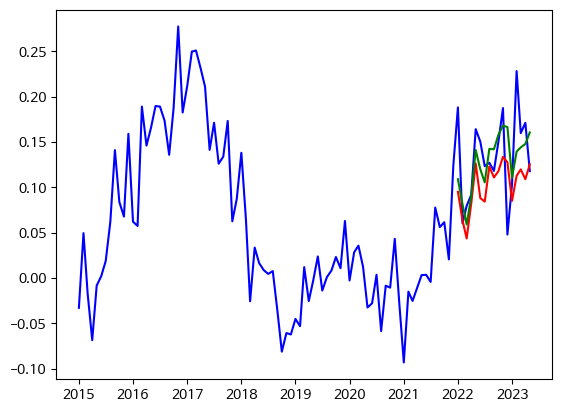

In [294]:
X = df_short_index_22[["CRA_dif_1", "Oil_dif_15", "Steal_dif_14", "Coal_dif_24", "GSCPI_17", "EXR_dif_24", "CPA_dif_30", "RES_dif_30", "index_12"]]
y = df_short_index[["CRA_dif"]]
X = sm.add_constant(X)

Xe = df_short_index_22[["CRA_dif_1", "Oil_dif_15", "Steal_dif_14", "Coal_dif_24", "GSCPI_17", "EXR_dif_24", "CPA_dif_30", "RES_dif_30"]]

ypred = res12.predict(X)
yprede = res12e.predict(Xe)
print(ypred)
print(yprede)

y.index = pd.to_datetime(y.index, format="%Y-%m")
ypred.index = pd.to_datetime(ypred.index, format="%Y-%m")
yprede.index = pd.to_datetime(yprede.index, format="%Y-%m")

fig, ax = plt.subplots()
ax.plot(y["CRA_dif"], "b", label="True value")
ax.plot(ypred, "r", label="Prediction with NEWs Index")
ax.plot(yprede, "green", label="Prediction without NEWs Index")